In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from pathlib import Path
import copy

import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
dir_s2p_outer         = Path(r'/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/').resolve()

In [4]:
# import sys
# sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2

# from basic_neural_processing_modules import ca2p_preprocessing, file_helpers
from bnpm import ca2p_preprocessing, file_helpers, path_helpers
import bnpm.path_helpers, bnpm.file_helpers

In [5]:
%load_ext autoreload
%autoreload 2
import roicat


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
paths_tmp = bnpm.path_helpers.find_paths(
    dir_outer=dir_s2p_outer,
    reMatch='stat.npy',
    depth=4,
)

In [7]:
dates_of_files = [Path(d).parent.name for d in paths_tmp]

In [8]:
dirs_s2p_all = {d: str(Path(p).resolve().parent) for d, p in zip(dates_of_files, paths_tmp)}

In [9]:
paths_s2p = {fn: {d: str(Path(p) / fn) for d, p in dirs_s2p_all.items()} for fn in ['stat.npy', 'ops.npy', 'F.npy', 'Fneu.npy']}

In [10]:
dirs_s2p_all

{'20230419': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230419',
 '20230420': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420',
 '20230424': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230424',
 '20230425': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230425',
 '20230426': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230426',
 '20230427': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230427',
 '20230428': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230428',
 '20230429': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230429',
 '20230430': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230430',
 '20230501': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230501',
 '20230502': '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230502',
 '20230503': '/media/

In [11]:
## == IMPORT DATA ==
data_s2p_all = {d: ca2p_preprocessing.import_s2p(p) for d, p in dirs_s2p_all.items()}

iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230419
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230426
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230427
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230428
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230429
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230430
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230501
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230502
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230503
iscell.npy not found in /media

In [12]:
data_s2p_all = {d: {
    'F': s[0], 
    'Fneu': s[1], 
    'iscell': s[2], 
    'ops': s[3], 
    'spks': s[4], 
    'stat': s[5]
} for d, s in data_s2p_all.items()}

  0%|                                                    | 0/18 [00:00<?, ?it/s]

Calculated dFoF. Total elapsed time: 0.81 seconds



100%|███████████████████████████████████████████| 36/36 [00:22<00:00,  1.58it/s]


Calculated dFoF. Total elapsed time: 35.44 seconds


  6%|██▍                                         | 1/18 [00:42<12:06, 42.74s/it]

ROIs excluded: 634 / 2413
ROIs included: 1779 / 2413
Calculated dFoF. Total elapsed time: 0.83 seconds



100%|███████████████████████████████████████████| 36/36 [00:24<00:00,  1.50it/s]


Calculated dFoF. Total elapsed time: 36.68 seconds


 11%|████▉                                       | 2/18 [01:26<11:31, 43.20s/it]

ROIs excluded: 594 / 2431
ROIs included: 1837 / 2431
Calculated dFoF. Total elapsed time: 0.87 seconds



100%|███████████████████████████████████████████| 36/36 [00:24<00:00,  1.47it/s]


Calculated dFoF. Total elapsed time: 37.5 seconds


 17%|███████▎                                    | 3/18 [02:15<11:27, 45.84s/it]

ROIs excluded: 735 / 2576
ROIs included: 1841 / 2576
Calculated dFoF. Total elapsed time: 0.82 seconds



100%|███████████████████████████████████████████| 36/36 [00:23<00:00,  1.54it/s]


Calculated dFoF. Total elapsed time: 37.42 seconds


 22%|█████████▊                                  | 4/18 [03:03<10:54, 46.73s/it]

ROIs excluded: 657 / 2464
ROIs included: 1807 / 2464
Calculated dFoF. Total elapsed time: 0.77 seconds



100%|███████████████████████████████████████████| 36/36 [00:22<00:00,  1.59it/s]


Calculated dFoF. Total elapsed time: 37.67 seconds


 28%|████████████▏                               | 5/18 [03:50<10:11, 47.06s/it]

ROIs excluded: 901 / 2297
ROIs included: 1396 / 2297
Calculated dFoF. Total elapsed time: 0.8 seconds



100%|███████████████████████████████████████████| 36/36 [00:22<00:00,  1.60it/s]


Calculated dFoF. Total elapsed time: 38.29 seconds


 33%|██████████████▋                             | 6/18 [04:39<09:28, 47.39s/it]

ROIs excluded: 627 / 2314
ROIs included: 1687 / 2314
Calculated dFoF. Total elapsed time: 0.89 seconds



100%|███████████████████████████████████████████| 36/36 [00:23<00:00,  1.51it/s]


Calculated dFoF. Total elapsed time: 39.19 seconds


 39%|█████████████████                           | 7/18 [05:30<08:55, 48.71s/it]

ROIs excluded: 763 / 2603
ROIs included: 1840 / 2603
Calculated dFoF. Total elapsed time: 0.95 seconds



100%|███████████████████████████████████████████| 36/36 [00:26<00:00,  1.38it/s]


Calculated dFoF. Total elapsed time: 39.77 seconds


 44%|███████████████████▌                        | 8/18 [06:22<08:17, 49.75s/it]

ROIs excluded: 791 / 2785
ROIs included: 1994 / 2785
Calculated dFoF. Total elapsed time: 0.89 seconds



100%|███████████████████████████████████████████| 36/36 [00:24<00:00,  1.47it/s]


Calculated dFoF. Total elapsed time: 39.26 seconds


 50%|██████████████████████                      | 9/18 [07:13<07:31, 50.15s/it]

ROIs excluded: 822 / 2659
ROIs included: 1837 / 2659
Calculated dFoF. Total elapsed time: 0.95 seconds



100%|███████████████████████████████████████████| 36/36 [00:25<00:00,  1.42it/s]


Calculated dFoF. Total elapsed time: 40.12 seconds


 56%|███████████████████████▉                   | 10/18 [08:05<06:46, 50.84s/it]

ROIs excluded: 809 / 2774
ROIs included: 1965 / 2774
Calculated dFoF. Total elapsed time: 0.81 seconds



100%|███████████████████████████████████████████| 36/36 [00:20<00:00,  1.73it/s]


Calculated dFoF. Total elapsed time: 34.92 seconds


 61%|██████████████████████████▎                | 11/18 [08:50<05:43, 49.05s/it]

ROIs excluded: 716 / 2382
ROIs included: 1666 / 2382
Calculated dFoF. Total elapsed time: 0.8 seconds



100%|███████████████████████████████████████████| 36/36 [00:20<00:00,  1.73it/s]


Calculated dFoF. Total elapsed time: 32.88 seconds


 67%|████████████████████████████▋              | 12/18 [09:34<04:44, 47.42s/it]

ROIs excluded: 647 / 2380
ROIs included: 1733 / 2380
Calculated dFoF. Total elapsed time: 0.79 seconds



100%|███████████████████████████████████████████| 36/36 [00:21<00:00,  1.70it/s]


Calculated dFoF. Total elapsed time: 33.51 seconds


 72%|███████████████████████████████            | 13/18 [10:18<03:51, 46.34s/it]

ROIs excluded: 670 / 2406
ROIs included: 1736 / 2406
Calculated dFoF. Total elapsed time: 0.83 seconds



100%|███████████████████████████████████████████| 36/36 [00:22<00:00,  1.62it/s]


Calculated dFoF. Total elapsed time: 34.75 seconds


 78%|█████████████████████████████████▍         | 14/18 [11:03<03:04, 46.11s/it]

ROIs excluded: 674 / 2538
ROIs included: 1864 / 2538
Calculated dFoF. Total elapsed time: 0.75 seconds



100%|███████████████████████████████████████████| 36/36 [00:20<00:00,  1.72it/s]


Calculated dFoF. Total elapsed time: 32.94 seconds


 83%|███████████████████████████████████▊       | 15/18 [11:46<02:14, 44.99s/it]

ROIs excluded: 744 / 2237
ROIs included: 1493 / 2237
Calculated dFoF. Total elapsed time: 0.79 seconds



100%|███████████████████████████████████████████| 36/36 [00:22<00:00,  1.63it/s]


Calculated dFoF. Total elapsed time: 35.11 seconds


 89%|██████████████████████████████████████▏    | 16/18 [12:31<01:30, 45.07s/it]

ROIs excluded: 705 / 2464
ROIs included: 1759 / 2464
Calculated dFoF. Total elapsed time: 0.72 seconds



100%|███████████████████████████████████████████| 36/36 [00:19<00:00,  1.80it/s]


Calculated dFoF. Total elapsed time: 33.58 seconds


 94%|████████████████████████████████████████▌  | 17/18 [13:14<00:44, 44.44s/it]

ROIs excluded: 765 / 2241
ROIs included: 1476 / 2241
Calculated dFoF. Total elapsed time: 0.8 seconds



100%|███████████████████████████████████████████| 36/36 [00:21<00:00,  1.68it/s]


Calculated dFoF. Total elapsed time: 35.27 seconds


100%|███████████████████████████████████████████| 18/18 [14:01<00:00, 46.73s/it]

ROIs excluded: 664 / 2455
ROIs included: 1791 / 2455


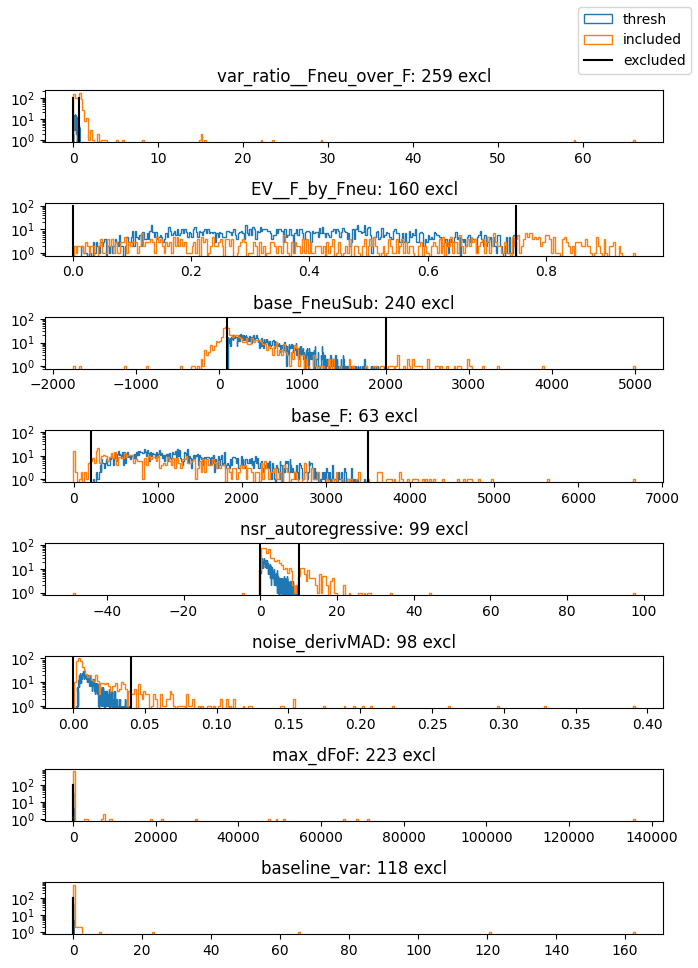

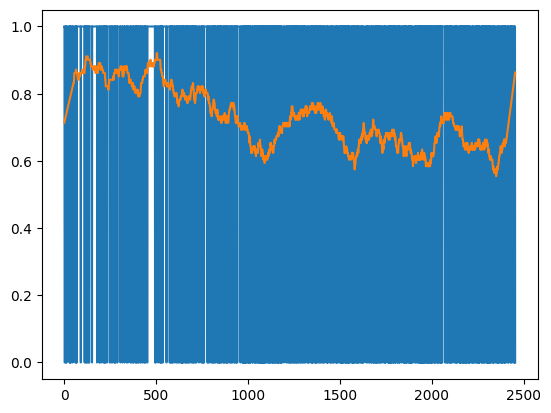

In [20]:
results = {}

for date, data in tqdm(data_s2p_all.items()):
    F, Fneu, ops, stat = data['F'], data['Fneu'], data['ops'], data['stat']
    
    n_frames, n_rois = F.shape[1], F.shape[0]
    Fs = ops['fs']

    # channelOffset_correction = 0
    percentile_baseline = 30
    neuropil_fraction=0.7

    dFoF , dF , F_neuSub , F_baseline = ca2p_preprocessing.make_dFoF(
        F=F,
        Fneu=Fneu,
        neuropil_fraction=neuropil_fraction,
        percentile_baseline=percentile_baseline,
        rolling_percentile_window=None,
        multicore_pref=True,
        verbose=True
    )

    dFoF_params = {
        "channelOffset_correction": 0,
        "percentile_baseline": percentile_baseline,
        "neuropil_fraction": neuropil_fraction,
    }

    # dFoF with reduced percentile for baseline
    channelOffset_correction = 0
    percentile_baseline = 30
    neuropil_fraction = 0.7
    win_rolling_percentile = 15*60*30

    dFoF_rollingPtile, dF_rollingPtile, F_neuSub_rollingPtile, F_baseline_rollingPtile = ca2p_preprocessing.make_dFoF(
        F=F,
        Fneu=Fneu,
        neuropil_fraction=neuropil_fraction,
        percentile_baseline=percentile_baseline,
        rolling_percentile_window=win_rolling_percentile,
        multicore_pref=True,
        verbose=True
    )
    # # Threshold for nonnegativity
    # dFoF_z = dFoF / np.std(dFoF,axis=1,keepdims=True)

    dFoF_params = {
        "channelOffset_correction": 0,
        "percentile_baseline": percentile_baseline,
        "neuropil_fraction": neuropil_fraction,
    }

    %matplotlib inline

    # thresh = {
    #     'var_ratio': 0.4,
    #     'EV_F_by_Fneu': 0.5,
    #     'base_FneuSub': 200,
    #     'base_F': 100,
    #     'peter_noise_levels': 5,
    #     'rich_nsr': 7,
    #     'max_dFoF': 10,
    #     'baseline_var': 0.0003,
    # }

    thresh = {
        'var_ratio__Fneu_over_F': (0, 0.75),
        'EV__F_by_Fneu': (0, 0.75),
        'base_FneuSub': (100, 2000),
        'base_F': (200, 3500),
        'nsr_autoregressive': (0, 10),
        'noise_derivMAD': (0, 0.04),
        'max_dFoF': (0.75, 15),
        'baseline_var': (0, 0.02),
    }

    tqm, iscell_tqm = ca2p_preprocessing.trace_quality_metrics(
        F=F,
        Fneu=Fneu,
        dFoF=dFoF_rollingPtile,
        F_neuSub=F_neuSub,
        F_baseline_roll=F_baseline_rollingPtile,
        percentile_baseline=percentile_baseline,
        window_rolling_baseline=win_rolling_percentile,
        Fs=Fs,
        plot_pref=True,
        thresh=thresh,
    )
    idxROI_tqm_toInclude = np.where(iscell_tqm)[0]
    idxROI_tqm_toExclude = np.where(~iscell_tqm)[0]
    
    results[date] = {
        'tqm': tqm,
        'iscell_tqm': iscell_tqm,
    }

In [ ]:
file_helpers.pickle_save(
    obj={
        "tqm": tqm,
        "iscell_tqm": iscell_tqm,
        "dFoF_params": dFoF_params
    },
    filepath=str(Path(r'/media/rich/bigSSD/analysis_data/BMI/trace_quality_posthoc/mouse_0322R/').resolve() / 'trace_quality_posthoc.pkl'),
    mkdir=True,
    allow_overwrite=False,
)

# np.save(
#     file= dir_save / 'iscell_NN_tqm.npy',
#     arr=iscell_new
# )